# 朴素贝叶斯
## 概述
贝叶斯分类算法是统计学中一种 **概率分类** 方法，朴素贝叶斯分类是贝叶斯分类中最简单的一种。分类原理就是利用贝叶斯公司根据某特征的 **先验概率** 计算出其 **后验概率**，然后选择具有较大后验概率的类作为该特征所属的类。之所以称为“朴素”，是因为贝叶斯分类只做最原始、最简单的假设：所有特征之间是 **统计独立** 的。

假设某样本 $X$ 有 $a_1,a_2,\cdots ,a_n$ 个属性，那么有
$$
P(X) = P(a_1,a_2,\cdots ,a_n) = \prod_{i=1}^n P(a_i|X)
$$
满足这样的公式就说明特征统计独立

### 1、条件概率公式
条件概率 $(Condition Probability)$，就是指在事件 $B$ 发生的情况下，$A$ 发生的概率，用 $P(A|B)$ 表示。
![文氏图](\images/文氏图.png)

根据文氏图可知，在事件 $B$ 发生的情况下，事件 $A$ 发生的概率就是 $\displaystyle \frac{P(A \cap B)}{P(B)}$
$$
P(A|B) = \frac{P(A \cap B)}{P(B)} \implies P(A \cap B) = p(B)p(A|B)
$$
同理可得
$$
P(A \cap B) = P(A)P(B|A)
$$
所以
$$
P(A|B)P(B) = P(B|A)P(A) \implies P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$
全概率公式，如果事件 $A_1,A_2,\cdots ,A_n$ 构成一个完备事件且都有正概率，那么对于任意一个事件 $B$ 有：
$$
\begin{aligned}
    P(B)&= P(BA_1)+P(BA_2)+\cdots +P(BA_n) \\
    &= P(B|A_1)P(A_1)+P(B|A_2)P(A_2)+\cdots +P(B|A_n)P(A_n)
\end{aligned}
P(B) = \sum_{i=1}^{n}P(B|A_i)P(A_i)
$$

### 2、贝叶斯推断
根据条件概率和全概率公式，可以得到贝叶斯公式如下：
$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A_i|B) = \frac{P(A_i)P(B|A_i)}{\sum_{i=1}^{n}P(B|A_i)P(A_i)}
$$
其中

$P(A)$ 称为 **先验概率（Prior Probability）**，即在事件 $B$ 发生之前，对事件 $A$ 概率的一个判断

$P(A|B)$ 称为 **后验概率（Posterior Probability）**，即在事件 $B$ 发生之后，对事件 $A$ 概率的一个重新评估

$\displaystyle \frac{P(B|A)}{P(B)}$ 称为 **可能性函数**，这是一个调整因子，是的预估概率更接近实际概率。

所以条件概率可以理解为：**后验概率 = 先验概率 * 调整因子**

- 若可能性函数 > 1，意味着先验概率被增强，事件 $A$ 发生的可能性变大
- 若可能性函数 = 1，意味着事件 $B$ 无助于判断事件 $A$ 的可能性
- 若可能性函数 < 1，意味着先验概率被削弱，事件 $A$ 发生的可能性变小

## 朴素贝叶斯种类
在 `scikit-learn` 中，有三种朴素贝叶斯的分类算法。分别是 `GaussianNB`、`MultinomialNB` 和 `BernoulliNB`。

### 1、GaussianNB
`GaussianNB` 是先验为 **高斯分布(正态分布)** 的朴素贝叶斯，假设每个标签的数据都服从简单的正态分布。
$$
P(X_j = x_i|Y = C_k) = \frac{1}{\sqrt{2\pi\sigma_k^2}}\exp\left(-\frac{(x_i-\mu_k)^2}{2\sigma_k^2}\right)
$$
其中 $C_k$ 为 $Y$ 的第 $k$ 类类别。$\mu_k、\sigma^{2}_k$ 需要从训练集估计

使用 `scilit-learn` 简单实现 `GaussianNB`

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 导入数据集
from sklearn import datasets
iris=datasets.load_iris()

# 切分数据集
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data,
                                                iris.target,
                                                random_state=12)

# 建模
clf = GaussianNB()
clf.fit(Xtrain, ytrain)

GaussianNB()

In [2]:
#在测试集上执行预测，proba导出的是每个样本属于某类的概率
clf.predict(Xtest)
clf.predict_proba(Xtest)

array([[1.00000000e+000, 2.32926069e-017, 1.81656357e-023],
       [4.28952299e-154, 2.48576754e-002, 9.75142325e-001],
       [1.00000000e+000, 7.45528845e-018, 3.79800436e-024],
       [3.59748710e-076, 9.99751806e-001, 2.48194200e-004],
       [2.20411871e-239, 4.45798016e-009, 9.99999996e-001],
       [1.23795145e-173, 1.95814902e-003, 9.98041851e-001],
       [2.45866589e-206, 2.34481513e-007, 9.99999766e-001],
       [1.00000000e+000, 2.61810906e-017, 2.67446831e-023],
       [3.07448595e-259, 9.07196639e-011, 1.00000000e+000],
       [1.00000000e+000, 1.14549667e-010, 3.00314173e-017],
       [1.64566141e-101, 9.87428016e-001, 1.25719837e-002],
       [1.00000000e+000, 5.62770009e-016, 8.77233124e-022],
       [1.00000000e+000, 9.78098062e-014, 4.81247272e-020],
       [1.00000000e+000, 3.96616431e-015, 3.17162008e-021],
       [2.58159395e-110, 7.85918892e-001, 2.14081108e-001],
       [8.01004975e-208, 8.36611920e-006, 9.99991634e-001],
       [2.27845999e-193, 5.52863568e-004

In [3]:
#测试准确率
accuracy_score(ytest, clf.predict(Xtest))

0.9736842105263158

### 2、MultinomialNB
`MultinomialNB` 是先验为 **多项式分布** 的朴素贝叶斯，假设每个标签的数据都服从多项分布。它假设特征是由一个简单多项式分布生成的。
多项分布可以描述各种类型样本出现次数的概率，因此多项式朴素贝叶斯非常适合用于描述出现次数或
者出现次数比例的特征。该模型常用于文本分类，特征表示的是次数，例如某个词语的出现次数。
多项式分布公式如下：
$$
P(X_j = x_{jl}|Y = C_k) = \frac{x_{jl}+\lambda}{m_k+n\lambda}
$$

其中,$P(X_j = x_{jl}|Y = C_k)$ 是第 $k$ 个类别的第 $j$ 维特征的第 $l$ 个取值条件的概率

$m_k$ 是训练集中输出为第 $k$ 类的样本个数.

$\lambda$ 为一个大于0的常数，常常取为1，即拉普拉斯平滑。也可以取其他值。

### 3、BernoulliNB
`BernoulliNB` 是先验为 **伯努利分布** 的朴素贝叶斯，假设特征的先验概率为二元伯努利分布，即如下式：
$$
P(X_j = x_{jl}|Y = C_k) = P(j|Y = C_k)x_{jl} + (1-P(j|Y = C_k))(1-x_{jl})
$$
此时 $l$ 只有两种取值,$x_{jl}$ 只能取1或0.

在伯努利模型中，每个特征的取值是布尔型的，即true和false，或者1和0。在文本分类中，就是一个特征有没有在一个文档中出现。

### 总结
- 一般来说，如果样本特征的分布大部分是连续值，使用 `GaussianNB` 会比较好。
- 如果样本特征的分布大部分是多元离散值，使用 `MultinomialNB` 比较合适。
- 而如果样本特征是二元离散值或者很稀疏的多元离散值，应该使用 `BernoulliNB`。

## 鸢尾花数据实验
使用 `GaussianNB` 对鸢尾花数据进行分类。

In [4]:
import numpy as np
import pandas as pd
import random

# 导入数据集
dataSet = pd.read_csv('../03-Navie_Byes/expDataSet/iris.txt', header=None)
dataSet.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# 切分训练集和测试集

def randSplit(dataSet, rate):
    """随机切分数据集和训练集

    Parameters
    ----------
    dataSet : 
        原始数据集
    rate : 
        训练集占比

    Returns
    -------
    train, test :
        随机切分的训练集和测试集合
    """    
    l = list(dataSet.index)                 #提取出索引
    random.shuffle(l)                       #随机打乱索引
    dataSet.index = l                       #将打乱后的索引重新赋值给原数据集
    n = dataSet.shape[0]                    #总行数
    m = int(n * rate)                       #训练集的数量
    train = dataSet.loc[range(m), :]        #提取前m个记录作为训练集
    test = dataSet.loc[range(m, n), :]      #剩下的作为测试集
    dataSet.index = range(dataSet.shape[0]) #更新原数据集的索引
    test.index = range(test.shape[0])       #更新测试集的索引
    return train, test

train, test = randSplit(dataSet, 0.8)

In [6]:
# 构建朴素贝叶斯分类器
def gnb_classify(train,test):
    labels = train.iloc[:,-1].value_counts().index #提取训练集的标签种类
    mean =[] #存放每个类别的均值
    std =[] #存放每个类别的方差
    result = [] #存放测试集的预测结果
    for i in labels:
        item = train.loc[train.iloc[:,-1]==i,:] #分别提取出每一种类别
        m = item.iloc[:,:-1].mean() #当前类别的平均值
        s = np.sum((item.iloc[:,:-1]-m)**2)/(item.shape[0]) #当前类别的方差
        mean.append(m) #将当前类别的平均值追加至列表
        std.append(s) #将当前类别的方差追加至列表
    means = pd.DataFrame(mean,index=labels) #变成DF格式，索引为类标签
    stds = pd.DataFrame(std,index=labels) #变成DF格式，索引为类标签
    for j in range(test.shape[0]):
        iset = test.iloc[j,:-1].tolist() #当前测试实例
        iprob = np.exp(-1*(iset-means)**2/(stds*2))/(np.sqrt(2*np.pi*stds)) #正态分布公式
        prob = 1 #初始化当前实例总概率
        for k in range(test.shape[1]-1): #遍历每个特征
            prob *= iprob[k] #特征概率之积即为当前实例概率
            cla = prob.index[np.argmax(prob.values)] #返回最大概率的类别
        result.append(cla)
    test['predict'] = result #添加预测结果列
    acc = (test.iloc[:,-1]==test.iloc[:,-2]).mean() #计算预测准确率
    print(f'模型预测准确率为{acc}')
    return test

In [7]:
gnb_classify(train,test)

模型预测准确率为1.0


,0,1,2,3,4,predict
0,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica
1,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
2,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
3,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
4,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
5,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor
6,4.8,3.1,1.6,0.2,Iris-setosa,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
8,5.6,2.7,4.2,1.3,Iris-versicolor,Iris-versicolor
9,6.4,2.8,5.6,2.1,Iris-virginica,Iris-virginica


In [8]:
for i in range(20):
    train,test= randSplit(dataSet, 0.8)
    gnb_classify(train,test)

模型预测准确率为0.9333333333333333
模型预测准确率为0.9
模型预测准确率为0.9333333333333333
模型预测准确率为0.9333333333333333
模型预测准确率为0.8666666666666667
模型预测准确率为1.0
模型预测准确率为0.9
模型预测准确率为0.9333333333333333
模型预测准确率为0.9333333333333333
模型预测准确率为1.0
模型预测准确率为0.8666666666666667
模型预测准确率为0.9666666666666667
模型预测准确率为0.9333333333333333
模型预测准确率为0.9666666666666667
模型预测准确率为0.9666666666666667
模型预测准确率为0.9666666666666667
模型预测准确率为0.9666666666666667
模型预测准确率为0.9333333333333333
模型预测准确率为0.9666666666666667
模型预测准确率为1.0


## 文档分类实验
朴素贝叶斯一个很重要的应用就是文本分类，所以我们以在线社区留言为例。为了不影响社区的发
展，我们要屏蔽侮辱性的言论，所以要构建一个快速过滤器，如果某条留言使用了负面或者侮辱性的语
言，那么就将该留言标志为内容不当。过滤这类内容是一个很常见的需求。对此问题建立两个类型：侮
辱类和非侮辱类，使用1和0分别表示。

我们把文本看成单词向量或者词条向量，也就是说将句子转换为向量。考虑出现所有文档中的单词，
再决定将哪些单词纳入词汇表或者说所要的词汇集合，然后必须要将每一篇文档转换为词汇表上的向
量。简单起见，我们先假设已经将本文切分完毕，存放到列表中，并对词汇向量进行分类标注。

### 1、构建词向量
说明：留言文本已经被切分好，并且认为标注好类别，用于训练模型。

类别有两类，分别为
- 侮辱性：（1）
- 非侮辱性：（0）

此案例使用的函数说明：
- `loadDataSet`：创建实验数据集
- `createVocabList`：生成词汇表
- `setOfWord2Vec`：生成词向量
- `get_trainMat`：所有词条向量列表
- `trainNB`：朴素贝叶斯分类器训练函数
- `classifyNB`：朴素贝叶斯分类器分类函数
- `testingNB`：朴素贝叶斯分类器测试函数

In [9]:
def loadDataSet():
    """创建实验数据集
    Returns
    -------
    dataSet :
        切分好的样本词条
    classVec :
        类标签向量
    """
    dataSet=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
            ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
            ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
            ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
            ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop','him'],
            ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']] # 切分好的词条

    classVec = [0,1,0,1,0,1] #类标签向量：1 代表侮辱性词汇；2 代表非侮辱性词汇
    return dataSet,classVec

In [10]:
dataSet, classVec = loadDataSet()

### 2、构建词汇表

In [11]:
def createVocabList(dataSet):
    """将切分的样本词条整理成词汇表（不重复）

    Parameters
    ----------
    dataSet : 
        切分好的样本词条
    
    Return
    ----------
    vocabList :
        不重复词汇表
    """
    vocabSet = set()
    for doc in dataSet:
        vocabSet = vocabSet | set(doc) #取并集
        vocabList = list(vocabSet)
    return vocabList

In [12]:
vocabList = createVocabList(dataSet)

### 3、获得训练集向量
生成词向量：

In [13]:
def setOfWordVec(vocabList, inputSet):
    """根据vocabList词汇表 将inputSet向量化 向量的每个元素为1或0

    Parameters
    ----------
    vocabList : 
        词汇表（不重复）
    inputSet : 
        切分好的词条列表中的一条

    Return
    ----------
    returnVec :
        文档向量 词集模型
    """
    returnVec = [0] * len(vocabList) #init
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1
        else:
            print(f" {word} is not in my vocabulary!")
    return returnVec

所有词条向量列表：

In [14]:
def get_trainMat(dataSet):
    """生成训练集向量列表

    Parameters
    ----------
    dataSet
        切分好的样本词条
    
    Return
    ----------
    trainMat
        所有词条向量组成的列表
    """        
    trainMat = []
    vocabList = createVocabList(dataSet)
    for inputSet in dataSet:
        returnVec = setOfWordVec(vocabList, inputSet)
        trainMat.append(returnVec)
    return trainMat

In [15]:
trainMat = get_trainMat(dataSet)

### 4、朴素贝叶斯分类器训练函数

In [16]:
def trainNB(trainMat, classVec):
    """朴素贝叶斯分类器训练函数

    Parameters
    ----------
    trainMat
        训练文档矩阵
    classVec
        训练类别标签向量

    Return
    ---------
    p0v
        非侮辱类的条件概率数组
    p1v
        侮辱类的条件概率数组
    pAb
        文档属于侮辱类的概率
    """    
    n = len(trainMat)
    m = len(trainMat[0])
    pAb = sum(classVec)/n
    p0Num = np.zeros(m)
    p1Num = np.zeros(m)
    p0Denom = 0
    p1Denom = 0
    for i in range(n):
        if classVec[i] == 1:
            p1Num += trainMat[i]
            p1Denom += sum(trainMat[i])
        else:
            p0Num += trainMat[i]
            p0Denom += sum(trainMat[i])
    p1v = p1Num/p1Denom
    p0v = p0Num/p0Denom
    return p0v,p1v,pAb

In [17]:
p0v,p1v,pAb = trainNB(trainMat, classVec)

In [18]:
print(vocabList)

['to', 'help', 'licks', 'how', 'so', 'cute', 'steak', 'quit', 'take', 'love', 'ate', 'mr', 'dog', 'not', 'maybe', 'my', 'posting', 'worthless', 'stop', 'stupid', 'buying', 'please', 'problems', 'garbage', 'is', 'park', 'him', 'food', 'has', 'flea', 'I', 'dalmation']


In [19]:
p1v

array([0.05263158, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05263158, 0.05263158, 0.        ,
       0.        , 0.        , 0.10526316, 0.05263158, 0.05263158,
       0.        , 0.05263158, 0.10526316, 0.05263158, 0.15789474,
       0.05263158, 0.        , 0.        , 0.05263158, 0.        ,
       0.05263158, 0.05263158, 0.05263158, 0.        , 0.        ,
       0.        , 0.        ])

In [20]:
p0v

array([0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.        , 0.        , 0.04166667,
       0.04166667, 0.04166667, 0.04166667, 0.        , 0.        ,
       0.125     , 0.        , 0.        , 0.04166667, 0.        ,
       0.        , 0.04166667, 0.04166667, 0.        , 0.04166667,
       0.        , 0.08333333, 0.        , 0.04166667, 0.04166667,
       0.04166667, 0.04166667])

### 5、测试朴素贝叶斯分类器

In [21]:
from functools import reduce

In [22]:
def classifyNB(vec2classify, p0v, p1v, pAb):
    """朴素贝叶斯分类器分类函数

    Parameters
    ----------
    vec2classify
        待分类的词条数组
    p0v
        非侮辱类的条件概率数组
    p1v
        侮辱类的条件概率数组
    pAb
        文档属于侮辱类的概率
    Return
    ----------
    0
        属于非侮辱类
    1
        属于侮辱类
    """    
    p1 = reduce(lambda x,y: x*y, vec2classify * p1v) * pAb
    p0 = reduce(lambda x,y: x*y, vec2classify * p0v) * (1 - pAb)
    print('p0:',p0)
    print('p1:',p1)
    if p1 > p0:
        return 1
    else:
        return 0

In [23]:
def testingNB(testVec):
    dataSet, classVec = loadDataSet()
    vocabList = createVocabList(dataSet)
    trainMat = get_trainMat(dataSet)
    p0v, p1v, pAb = trainNB(trainMat, classVec)
    thisOne = setOfWordVec(vocabList, testVec)
    if classifyNB(thisOne, p0v, p1v, pAb) == 1:
        print(f"{testVec} is a abusive word!")
    else:
        print(f"{testVec} is not a abusive word!")

In [24]:
testVec1 = ['love','my','dalmation']
testingNB(testVec1)

testVec2 = ['stupid','garbage']
testingNB(testVec2)

p0: 0.0
p1: 0.0
['love', 'my', 'dalmation'] is not a abusive word!
p0: 0.0
p1: 0.0
['stupid', 'garbage'] is not a abusive word!


发现无法分类，两个计算结果都是0
### 6、朴素贝叶斯改进之拉普拉斯平滑
利用贝叶斯分类器对文档进行分类时，要计算多个概率的乘积以获得文档属于某个类别的概率，即计
算 $p(w0|1)p(w1|1)p(w2|1)$。如果其中有一个概率值为0，那么最后的成绩也为0。显然，这样是不合理
的，为了降低这种影响，可以将所有词的出现数初始化为1，并将分母初始化为2。这种做法就叫做拉普
拉斯平滑(Laplace Smoothing)又被称为加1平滑，是比较常用的平滑方法，它就是为了解决0概率问
题。

另外一个遇到的问题就是下溢出，这是由于太多很小的数相乘造成的。我们在计算乘积时，由于大部
分因子都很小，所以程序会下溢或者得不到正确答案。为了解决这个问题，对乘积结果取自然对数。通
过求对数可以避免下溢出或者浮点数舍入导致的错误。同时，采用自然对数进行处理不会有任何损失。
下图给出函数 $f(x)$ 和 $ln(f(x))$ 的曲线。

![](\images/改进.png)

发现两条曲线在相同区间内同时增加和减少，并且在相同点取到极值，虽然取值不同，但不影响最终结果，代码修改如下：


In [25]:
def trainNB(trainMat, classvec):
    n = len(trainMat)
    m = len(trainMat[0])
    pAb = sum(classVec)/n
    p0Num = np.ones(m)
    p1Num = np.ones(m)
    p0Denom = 2.0
    p1Denom = 2.0
    for i in range(n):
        if classVec[i] == 1:
            p1Num += trainMat[i]
            p1Denom += sum(trainMat[i])
        else:
            p0Num += trainMat[i]
            p0Denom += sum(trainMat[i])
    p1v = np.log(p1Num/p1Denom)
    p0v = np.log(p0Num/p0Denom)
    return p0v,p1v,pAb

In [26]:
p0v, p1v, pAb = trainNB(trainMat, classVec)

In [27]:
def classifyNB(vec2classify, p0v, p1v, pAb):
    p1 = sum(vec2classify * p1v) + np.log(pAb)
    p0 = sum(vec2classify * p0v) + np.log(1.0 - pAb)
    print('p0:',p0)
    print('p1:',p1)
    if p1 > p0:
        return 1
    else:
        return 0

In [28]:
testVec1 = ['love', 'my', 'dalmation']
testingNB(testVec1)

testVec2 = ['stupid', 'garbage']
testingNB(testVec2)

p0: -7.694848072384611
p1: -9.826714493730215
['love', 'my', 'dalmation'] is not a abusive word!
p0: -7.20934025660291
p1: -4.702750514326955
['stupid', 'garbage'] is a abusive word!


## 垃圾邮件过滤
### 1、获取数据集
所有邮件文本数据放在 email 文件夹中，ham 文件夹中为非垃圾邮件，spam 文件夹中为垃圾邮件

In [29]:
import os

def get_dataSet():
    """创建实验数据集

    Return
    --------
    dataSet
        带标签的实验数据集（DF格式）
    """    
    ham = []
    for i in range(1, 26):
        file_path = '../03-Navie_Byes/expDataSet/email/ham/%d.txt' %(i)
        # print(file_path)
        data = open(file_path, encoding='gbk', errors='ignore').read()
        ham.append([data,'ham'])
    df1 = pd.DataFrame(ham)
    spam = []
    for i in range (1, 26):
        file_path = '../03-Navie_Byes/expDataSet/email/spam/%d.txt' %(i)
        # print(file_path)
        data = open(file_path, encoding='gbk', errors='ignore').read()
        spam.append([data,'spam'])
    df2 = pd.DataFrame(spam)
    dataSet = pd.concat([df1,df2],ignore_index=True)
    return dataSet

In [30]:
dataSet = get_dataSet()
dataSet

,0,1
0,"Hi Peter,\n\nWith Jose out of town, do you wan...",ham
1,Yay to you both doing fine!\n\nI'm working on ...,ham
2,WHat is going on there?\nI talked to John on e...,ham
3,Yo. I've been working on my running website. ...,ham
4,There was a guy at the gas station who told me...,ham
5,"Hello,\n\nSince you are an owner of at least o...",ham
6,Zach Hamm commented on your status.\n\nZach wr...,ham
7,This e-mail was sent from a notification-only ...,ham
8,"Hi Peter,\n\nThese are the only good scenic on...",ham
9,Ryan Whybrew commented on your status.\n\nRyan...,ham


### 2、使用 SKlearn 对训练集进行特征值抽取
使用 `TfidVectorizer`，对文本信息进行特征值抽取

`TfidVectorizer` = `TfidTransformer` + `CountVectorizer`

- `CountVectorizer`: 将文本文档转换为计数矩阵
- `TfidTransformer`: 将计数矩阵转换为标准化的 TF 或 TF-IDF 矩阵

- TF(term-frequency)：词频
- IDF(inverse document frequency)：逆文档频率
- TF-IDF：TF * IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(dataSet[0])
data_tf = tf.transform(dataSet[0])
# data_tf = tf.fit_transform(dataSet[0])

### 3、切分训练集和测试集
以 $1：4$ 比例切分测试集和训练集，使用 `Sklearn` 的 `train_test_split` 函数切分数据集

In [32]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(data_tf, dataSet[1], test_size=0.2)
Xtest.shape[0]
ytest

35    spam
0      ham
24     ham
20     ham
18     ham
31    spam
8      ham
29    spam
22     ham
38    spam
Name: 1, dtype: object

### 4、训练模型
使用多项式分布朴素贝叶斯和伯努利分布朴素贝叶斯两种方法分别对模型进行训练

In [33]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

# 多项式分布
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)
mnb.score(Xtest, ytest) # 查看准确率

# 伯努利分布
bnb = BernoulliNB()
bnb.fit(Xtrain, ytrain)
bnb.score(Xtest, ytest)

1.0

### 5、交叉验证

In [34]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']

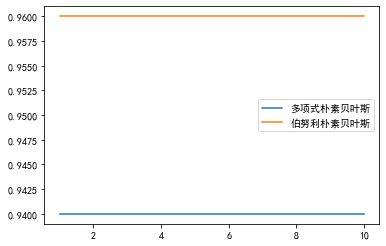

In [35]:
mnbs = []
bnbs = []
for i in range(10):
    mnb = MultinomialNB() 
    mnb_s = cross_val_score(mnb,data_tf,dataSet[1],cv=10).mean()
    mnbs.append(mnb_s)
    
    bnb = BernoulliNB()
    bnb_s = cross_val_score(bnb,data_tf,dataSet[1],cv=10).mean()
    bnbs.append(bnb_s)

plt.plot(range(1,11), mnbs, label = "多项式朴素贝叶斯")
plt.plot(range(1,11), bnbs, label = "伯努利朴素贝叶斯")
plt.legend()
plt.show()

## 算法总结
- 朴素贝叶斯优点：
  - 简单快速，预测表现良好
  - 直接使用概率预测，容易理解
  - 若变量独立这个条件成立，相比其他分类方法，朴素贝叶斯分类器性能更优，且只需少量训练模型
  - 相较于数值变量，朴素贝叶斯分类器在多个变量的情况下表现更好，若是数值变量，需要正态分布假设

这些优点可以使得朴素贝叶斯分类器通常很适合作为分类的初始解。如果分类效果满足要求，那么万事
大吉，你获得了一个非常快速且容易解释的分类器。但如果分类效果不够好，可以尝试更复杂的分类模型

- 朴素贝叶斯缺点：
  - 如果分类变量的类别（测数据集）没有在训练数据集总被观察到，那这个模型会分配一个0（零）概率给它，同时也会无法进行预测，这通常被称为“零频率”，为了解决这个问题，可以使用平滑技术，拉普拉斯估计是其中最基础的技术
  - 朴素贝叶斯也被称为 *bad estimator*，所以它的概率输出 *predict_proba* 不应该被太认真对待
  - 朴素贝叶斯的另一个限制是独立预测的假设。在现实生活中，这几乎是不可能的，各变量之间或多或少都会存在互相影响

- 朴素贝叶斯的应用：
  - **实时预测**：朴素贝叶斯简单快速
  - **多类预测**：朴素贝叶斯以多类别预测功能闻名
  - **文本分类/垃圾邮件过滤/情感分析**：相比较其他算法，朴素贝叶斯的应用主要集中在文本分类（变量类型多，且更独立），具有较高成功率。因此被广泛应用于垃圾邮件过滤（识别垃圾邮件）和情感分析（在社交媒体平台分辨积极情绪和消极情绪的用户）
  - **推荐系统**：朴素贝叶斯分类器和协同过滤结合使用可以过滤出用户想看到的和不想看到的东西

- 提升朴素贝叶斯分类器性能的 Tips：
  - 如果连续特征不是正态分布的，应使用各种不同的方法将其转换成正态分布
  - 如果测试数据集具有“零频率”的问题，应使用平滑技术“拉普拉斯估计”修正数据集
  - 删除重复出现的高度相关的特性，可能会丢失频率信息，影响效果
  - 朴素贝叶斯分类在参数调整上选择有限，建议把重点放在数据预处理和特征选择上